In [2]:
%pip install pandas matplotlib seaborn geopandas
%pip install cartopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


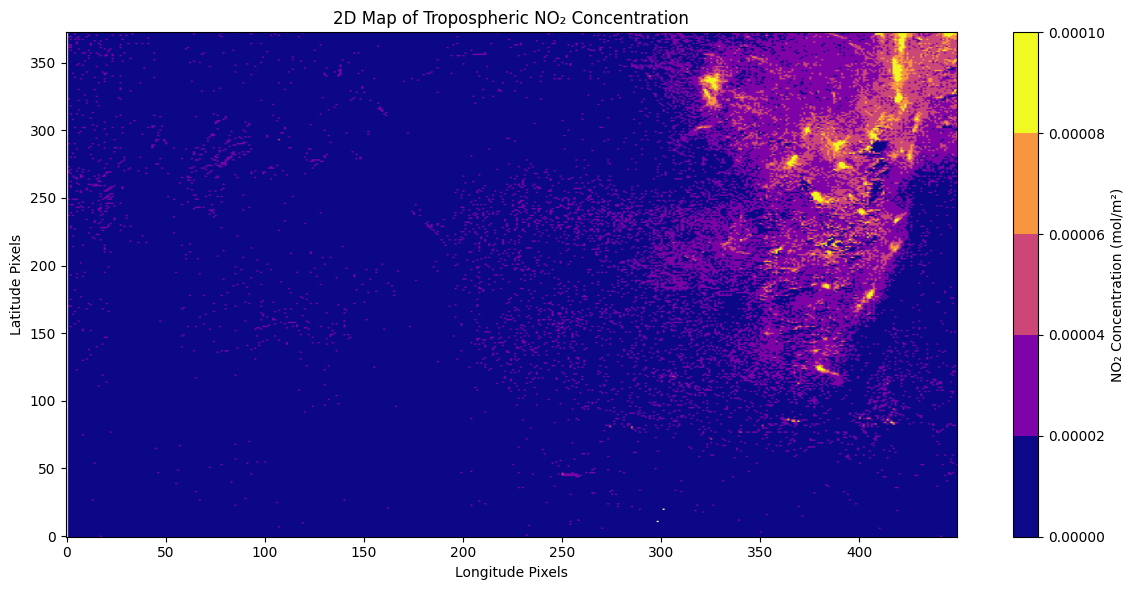

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm

# Load CSV without headers
df = pd.read_csv('C:/Users/shridhar01.TRN/Desktop/Urban Livability/Air Quality/nitrogendioxide_tropospheric_column.csv', header=None)

# Convert to 2D numpy array and mask invalid values
no2_array = df.values
no2_array = np.ma.masked_invalid(no2_array)

# Define color range boundaries and colormap
bounds = np.linspace(0.0, 0.0001, 6)  # 5 intervals
cmap = plt.get_cmap('plasma', len(bounds) - 1)
norm = BoundaryNorm(boundaries=bounds, ncolors=cmap.N, clip=True)

# Plot as 2D map
plt.figure(figsize=(12, 6))
img = plt.imshow(no2_array, cmap=cmap, norm=norm, origin='lower', aspect='auto')
cbar = plt.colorbar(img, ticks=bounds, boundaries=bounds)
cbar.set_label('NO₂ Concentration (mol/m²)')

plt.title('2D Map of Tropospheric NO₂ Concentration')
plt.xlabel('Longitude Pixels')
plt.ylabel('Latitude Pixels')
plt.tight_layout()
plt.show()


C:\Users\shridhar01.TRN\AppData\Roaming\Python\Python313\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\shridhar01.TRN\AppData\Roaming\Python\Python313\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


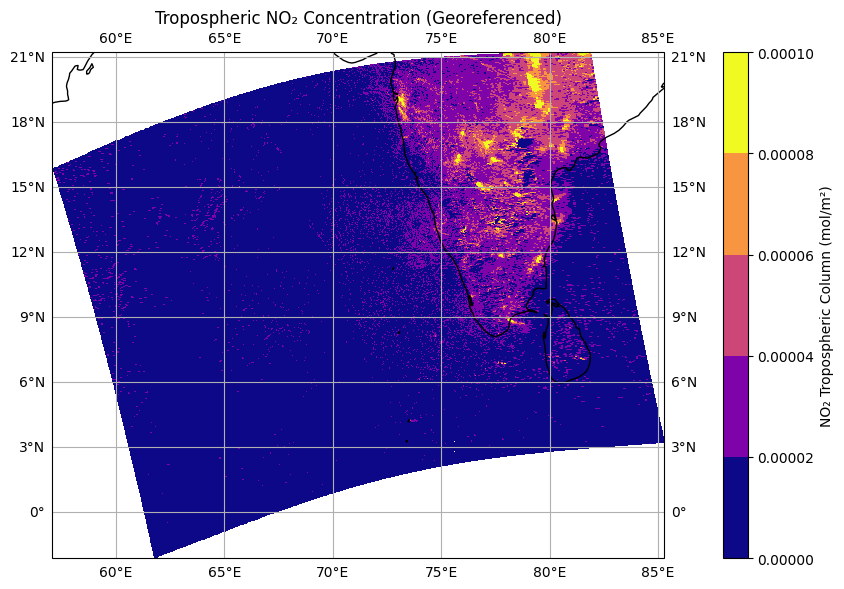

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# Load NO₂, latitude, and longitude CSVs (no headers)
no2_df = pd.read_csv('C:/Users/shridhar01.TRN/Desktop/Urban Livability/Air Quality/nitrogendioxide_tropospheric_column.csv', header=None)
lat_df = pd.read_csv('C:/Users/shridhar01.TRN/Desktop/Urban Livability/Air Quality/latitude.csv', header=None)
lon_df = pd.read_csv('C:/Users/shridhar01.TRN/Desktop/Urban Livability/Air Quality/longitude.csv', header=None)

# Convert all to NumPy arrays
no2_array = no2_df.values
lat_array = lat_df.values
lon_array = lon_df.values

# Mask invalid NO₂ values
no2_array = np.ma.masked_invalid(no2_array)

# Define color range boundaries and colormap
bounds = np.linspace(0.0, 0.0001, 6)  # 5 intervals
cmap = plt.get_cmap('plasma', len(bounds) - 1)
norm = BoundaryNorm(boundaries=bounds, ncolors=cmap.N, clip=True)

# Plot using actual lat/lon
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Define map extent from lat/lon data
lat_min, lat_max = lat_array.min(), lat_array.max()
lon_min, lon_max = lon_array.min(), lon_array.max()
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)

# Plot NO₂ data as color raster with boundaries
mesh = ax.pcolormesh(
    lon_array, lat_array, no2_array,
    cmap=cmap,
    norm=norm,
    shading='auto',
    transform=ccrs.PlateCarree()
)

# Add colorbar with boundaries
cbar = plt.colorbar(mesh, ticks=bounds, boundaries=bounds)
cbar.set_label('NO₂ Tropospheric Column (mol/m²)')

# Title and layout
plt.title('Tropospheric NO₂ Concentration (Georeferenced)')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


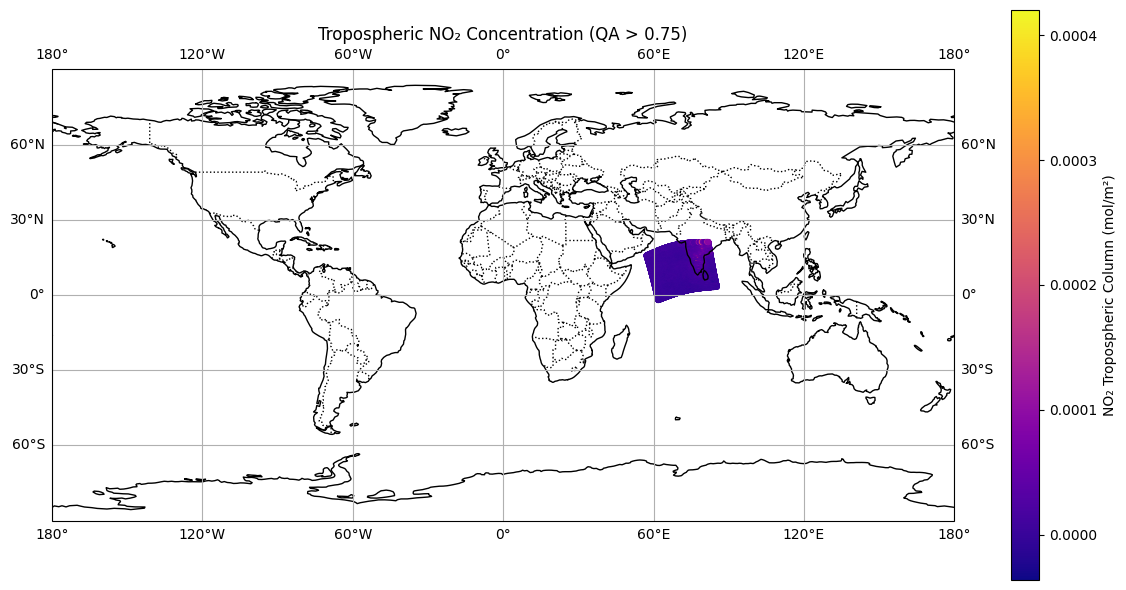

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load each file (no headers if pure grid format)
lat = pd.read_csv('/content/latitude.csv', header=None)
lon = pd.read_csv('/content/longitude.csv', header=None)
no2 = pd.read_csv('/content/nitrogendioxide_tropospheric_column.csv', header=None)
qa  = pd.read_csv('/content/qa_value.csv', header=None)

# Flatten all arrays to 1D for scatter plotting
lat_flat = lat.values.flatten()
lon_flat = lon.values.flatten()
no2_flat = no2.values.flatten()
qa_flat  = qa.values.flatten()

# Create a combined DataFrame
df = pd.DataFrame({
    'latitude': lat_flat,
    'longitude': lon_flat,
    'no2': no2_flat,
    'qa_value': qa_flat
})

# Filter: remove NaNs and apply QA threshold
df = df.dropna()
df = df[df['qa_value'] > 0.75]

# Plot
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)

# Plot NO₂ values as colored scatter
sc = ax.scatter(
    df['longitude'],
    df['latitude'],
    c=df['no2'],
    cmap='plasma',
    s=10,
    transform=ccrs.PlateCarree()
)

# Colorbar and labels
plt.colorbar(sc, label='NO₂ Tropospheric Column (mol/m²)')
plt.title('Tropospheric NO₂ Concentration (QA > 0.75)')
plt.tight_layout()
plt.show()
